In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import seaborn as sns


# Load the dataset
data = pd.read_csv('Merged_Data_Cleaned.csv')

# Print the summary statistics
data.describe()

,id,Loan Amount,Outstanding Balance,Outstanding Principal,Interest Rate,Loan Term (Months),Stated Income on application,Qualified / Verified\nIncome,Aptitude for change Score,Financial Literacy Score,Self Assessments,Quiz Count,Mood Count,Inspiration Count,Total Activies,Average total activities per month,Average activities per day,average_wellness_score,average_FICO,average_credit_utilisation
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,188.000000,188.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,181.000000,208.000000,208.000000
mean,11446.303318,14768.431896,20370.718768,12089.351280,0.284071,56.715640,78128.687204,74712.706161,3.595638,2.792553,8.128866,61.855670,10.175258,5.170103,85.329897,6.842678,0.228088,48.722638,629.453203,0.709731
std,5635.756041,5659.903418,10790.558090,6229.183424,0.017719,6.936768,50793.448599,45380.645756,1.072512,1.556270,6.084797,53.298454,20.252300,10.620975,80.430155,4.793183,0.159774,11.019077,47.367252,0.293061
min,123.000000,3000.000000,0.000000,0.000000,0.249900,26.000000,32570.000000,32000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.061200,0.002000,21.000000,439.000000,0.000000
25%,11183.500000,10179.620000,12748.005000,7867.910000,0.269900,58.500000,55000.000000,52500.000000,3.170000,2.000000,3.000000,15.250000,0.000000,0.000000,21.500000,1.818025,0.060625,42.636364,601.535714,0.536572
50%,13443.000000,14400.000000,20465.470000,12220.890000,0.289900,60.000000,70000.000000,68600.000000,3.830000,3.000000,7.000000,52.000000,2.000000,1.000000,64.000000,8.105150,0.270150,49.200000,632.625000,0.729328
75%,15533.500000,20000.000000,29365.620000,17550.330000,0.299900,60.000000,90581.500000,88600.000000,4.330000,4.000000,12.000000,98.000000,10.000000,4.000000,125.000000,9.659475,0.322000,55.071429,659.275000,0.904450
max,18063.000000,25000.000000,45848.500000,24927.320000,0.299900,60.000000,700000.000000,605300.000000,5.000000,5.000000,24.000000,196.000000,110.000000,65.000000,383.000000,22.941200,0.764700,78.166667,788.000000,2.437800


In [21]:
data.head(10)

,id,Disbursement Date,Loan Status,Written Off Or Repaid Date,Loan Amount,Outstanding Balance,Outstanding Principal,Interest Rate,Loan Term (Months),Date of Birth,...,Self Assessments,Quiz Count,Mood Count,Inspiration Count,Total Activies,Average total activities per month,Average activities per day,average_wellness_score,average_FICO,average_credit_utilisation
0,123,2022-07-19,Written off,2023-06-30 07:09:21.873,20479.34,32478.75,18658.79,0.2999,60,1974-10-10,...,6.0,48.0,4.0,0.0,58.0,2.3169,0.0772,21.000000,565.571429,0.947119
1,163,2022-07-26,Written off,2023-02-08 20:12:57.880,23500.00,24676.17,24676.16,0.2999,60,1986-02-20,...,2.0,14.0,4.0,3.0,23.0,0.9274,0.0309,NaN,628.000000,1.020166
2,1189,2022-08-12,Repaid,2023-08-29 04:42:12.323,16600.00,0.00,0.00,0.2499,60,1967-07-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.000000,0.679417
3,1200,2022-08-12,Written off,2023-07-06 15:40:04.223,25000.00,39481.69,22777.45,0.2899,60,1988-08-15,...,4.0,24.0,4.0,4.0,36.0,1.4856,0.0495,48.200000,612.571429,0.938035
4,1215,2022-08-31,Past due,NaN,14400.00,24501.73,14474.83,0.2799,52,1972-03-07,...,24.0,190.0,63.0,49.0,326.0,13.8136,0.4605,44.857143,524.000000,0.897727
5,1233,2022-08-12,Active,NaN,25000.00,4825.04,3223.87,0.2799,60,1972-02-03,...,4.0,16.0,4.0,4.0,28.0,1.1554,0.0385,50.000000,748.500000,0.636450
6,1236,2022-09-01,Written off,2023-07-23 10:36:36.270,20200.00,28617.49,18233.05,0.2999,48,1979-09-30,...,9.0,80.0,14.0,11.0,114.0,4.8373,0.1612,36.285714,599.142857,1.757357
7,1280,2022-08-31,Active,NaN,12800.00,10865.95,8179.77,0.2999,48,1979-03-14,...,24.0,194.0,28.0,16.0,262.0,11.1017,0.3701,60.478261,574.300000,0.870390
8,1295,2022-09-08,Active,NaN,13000.00,15085.93,9913.26,0.2999,60,1983-09-14,...,5.0,7.0,1.0,0.0,13.0,0.5571,0.0186,42.000000,652.200000,0.165667
9,1316,2022-09-08,Written off,2023-08-11 18:49:53.893,19000.00,30727.05,17806.68,0.2799,51,1988-12-16,...,10.0,98.0,46.0,31.0,185.0,7.9286,0.2643,46.500000,595.750000,0.923193


CLEAN AND PROCESS DATA

In [22]:
print(data.columns)
data.columns = data.columns.str.strip()

Index(['id', 'Disbursement Date', 'Loan Status', 'Written Off Or Repaid Date ',
       'Loan Amount', 'Outstanding Balance', 'Outstanding Principal',
       'Interest Rate', 'Loan Term (Months)', 'Date of Birth', 'Gender',
       'Province', 'Residential Status', 'Stated Income on application',
       'Qualified / Verified\nIncome', 'Aptitude for change Score',
       'Financial Literacy Score', 'Self Assessments', 'Quiz Count',
       'Mood Count', 'Inspiration Count', 'Total Activies ',
       'Average total activities per month', 'Average activities per day',
       'average_wellness_score', 'average_FICO', 'average_credit_utilisation'],
      dtype='object')


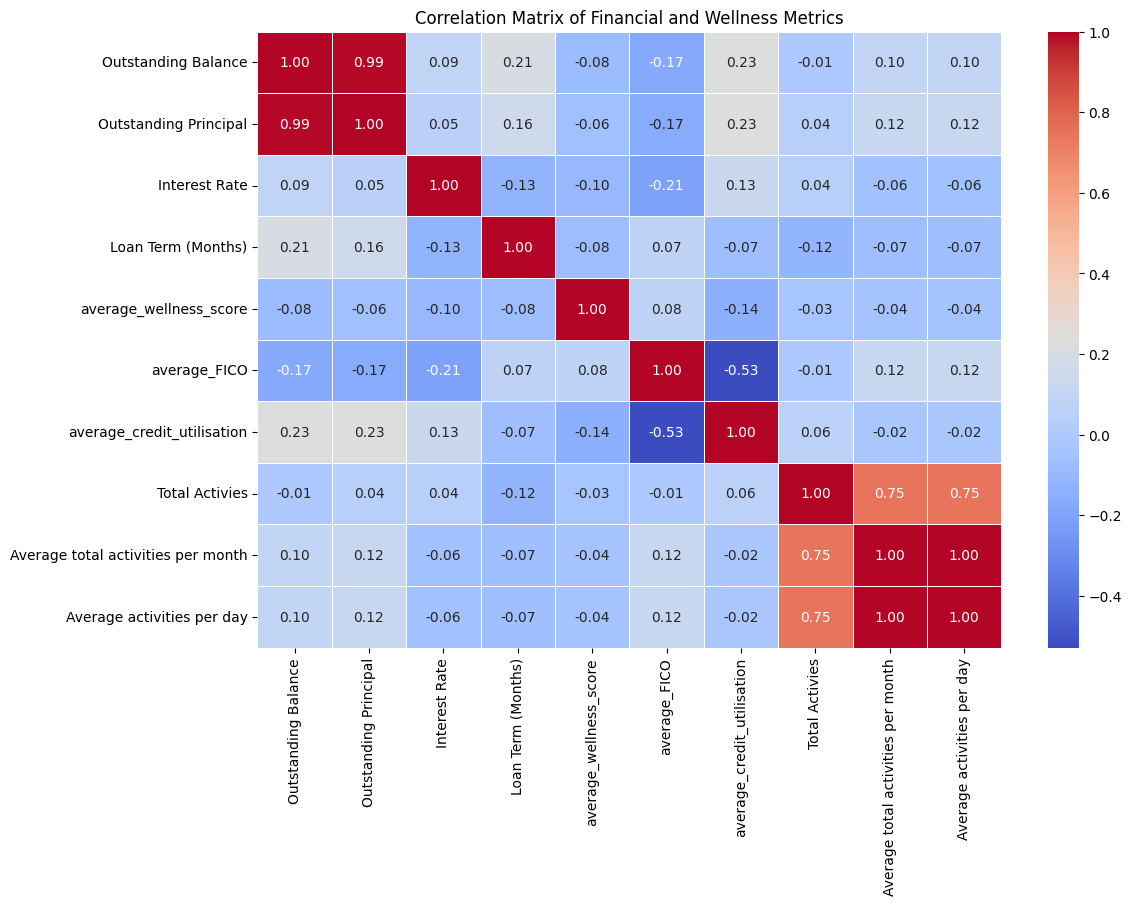

In [23]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the columns for analysis
# Here, we define the numeric columns that are relevant for analysis. These columns include financial metrics 
# like 'Outstanding Balance', 'Interest Rate', as well as wellness metrics like 'average_wellness_score' and 'Total Activies '.
numeric_columns = ['Outstanding Balance', 'Outstanding Principal', 'Interest Rate', 'Loan Term (Months)', 
                   'average_wellness_score', 'average_FICO', 'average_credit_utilisation', 
                   'Total Activies', 'Average total activities per month', 'Average activities per day']

# Step 2: Data Cleaning
# We drop any rows with missing data in the selected columns to ensure we are working with complete data.
eda_data = data[numeric_columns].dropna()

# Step 3: Correlation Matrix Calculation
# We calculate the correlation matrix, which shows how each variable is related to the others.
# Correlation values range from -1 to 1, where 1 indicates a perfect positive correlation, 
# and -1 indicates a perfect negative correlation.
correlation_matrix = eda_data.corr()

# Step 4: Plot the Heatmap
# We use Seaborn to plot the correlation matrix as a heatmap. The heatmap provides a visual representation of 
# the correlations, with colors indicating the strength of the relationship.
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Financial and Wellness Metrics')  # Add a title to the plot
plt.show()  # Display the heatmap





Key insights from the correlation matrix:

Credit utilization and FICO score have an inverse relationship, which aligns with the general expectation that higher credit utilization negatively impacts credit scores.

Outstanding Balance and Outstanding Principal are strongly correlated, which is also expected since the principal is a part of the balance.

Wellness-related metrics (such as average wellness score and total activities) may have weaker correlations with financial metrics, but further analysis could uncover indirect influences.

# Feature Engineering

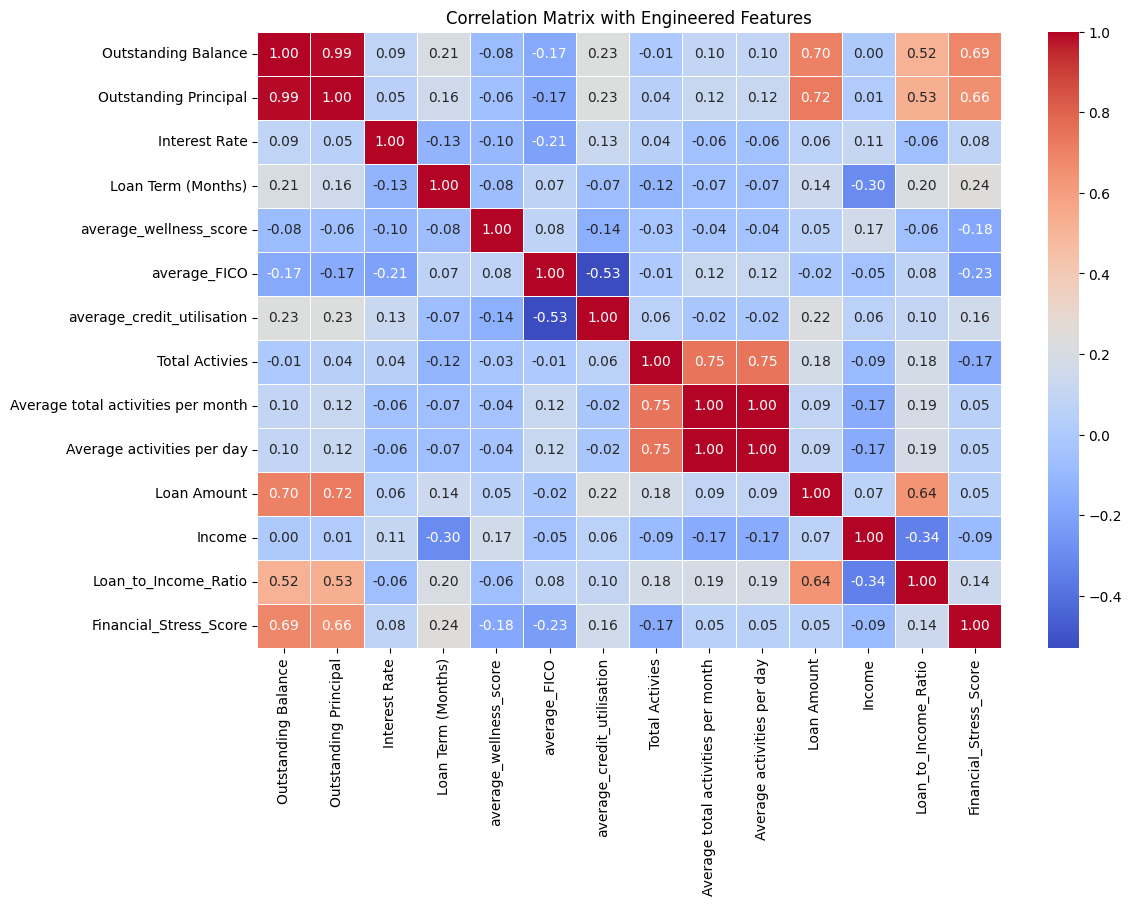

,Loan_to_Income_Ratio,Financial_Stress_Score,Repayment_Category,Activity_Level
0,0.186176,1.585928,Defaulted,Medium
3,0.268817,1.579268,Defaulted,Low
4,0.150047,1.701509,At Risk,High
5,0.362151,0.193002,At Risk,Low
6,0.331675,1.416707,Defaulted,Medium


In [24]:
# Step 3: Feature Engineering
# Create a new feature: Loan-to-Income Ratio
eda_data['Loan Amount'] = data['Loan Amount']
eda_data['Income'] = data['Stated Income on application']
eda_data['Loan_to_Income_Ratio'] = eda_data['Loan Amount'] / eda_data['Income']

# Create a new feature: Financial Stress Score
eda_data['Financial_Stress_Score'] = eda_data['Outstanding Balance'] / eda_data['Loan Amount']

# Categorize customers based on repayment behavior
def categorize_repayment(status):
    if status == 'Repaid':
        return 'Good Standing'
    elif status == 'Written off':
        return 'Defaulted'
    else:
        return 'At Risk'

eda_data['Repayment_Category'] = data['Loan Status'].apply(categorize_repayment)

# Categorize customers based on activity level
eda_data['Activity_Level'] = pd.cut(eda_data['Total Activies'], bins=[0, 50, 200, float('inf')],
                                    labels=['Low', 'Medium', 'High'], right=False)

# Step 4: Correlation Matrix Calculation (excluding non-numeric columns)
numeric_eda_data = eda_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_eda_data.corr()

# Step 5: Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Engineered Features')
plt.show()

# Step 6: Display the head of the dataset with new features
eda_data[['Loan_to_Income_Ratio', 'Financial_Stress_Score', 'Repayment_Category', 'Activity_Level']].head()



Loan-to-Income Ratio:

This feature is derived by dividing the loan amount by the customer's stated income. It reflects the financial burden a customer faces relative to their income and can be an important driver of financial well-being.

Financial Stress Score:

This score is computed by dividing the outstanding balance by the original loan amount. It represents the level of financial stress, as a higher outstanding balance relative to the original loan can indicate financial difficulties.

Categorizing Customers by Repayment Behavior:

We categorize customers into three groups: "Good Standing" (loans repaid), "Defaulted" (loans written off), and "At Risk" (loans past due). This helps segment customers based on repayment behavior, a key indicator of financial health.

Categorizing Customers by Activity Level:

Customers are grouped into "Low," "Medium," and "High" activity levels based on the total activities they have completed. These categories help understand how customer engagement correlates with financial well-being.

Key Correlation Results:
Outstanding Balance & Outstanding Principal: These two variables show a very high positive correlation (close to 1), which is expected because the principal is part of the outstanding balance. A higher outstanding principal generally means a higher overall outstanding balance.

Loan Amount & Outstanding Balance: There is a strong positive correlation between the original loan amount and the outstanding balance. This suggests that customers with larger loan amounts tend to have higher outstanding balances.

Interest Rate & Financial Metrics: The Interest Rate shows little to no strong correlation with most other financial and wellness metrics. This could imply that the interest rate alone may not be a strong determinant of other financial behaviors in the dataset, although it can affect individual loan terms.

Credit Utilization & FICO Score: There is a negative correlation between credit utilization and FICO score, which is a well-known financial relationship. High credit utilization generally lowers a person’s credit score, as it indicates a higher dependency on credit, which is seen as riskier by lenders.

Average Wellness Score & Financial Metrics: The average_wellness_score has relatively low correlations with financial metrics like outstanding balance and loan amount. This suggests that wellness-related factors may not directly influence financial well-being in this dataset, or that their relationship might be indirect or complex. However, it's important to explore these relationships further in modeling.

2. New Engineered Features:
Loan-to-Income Ratio: This newly derived feature shows the ratio of the loan amount to the customer’s income. A higher loan-to-income ratio indicates a higher financial burden, which might correlate with a higher risk of financial stress or default. You can explore this ratio's relationship with loan repayment outcomes (e.g., whether the loan was written off or repaid) to assess its predictive power.

Financial Stress Score: The financial stress score, calculated as the ratio of outstanding balance to loan amount, gives an indication of how much of the original loan is still owed. Higher values for this score would typically indicate customers who are more financially stressed, as they are having trouble paying down their loan principal. This score could be a strong predictor for identifying at-risk customers.

3. Categorical Features:
These features were created to categorize customers and can be used for further analysis or as inputs to models:

Repayment Category: This feature categorizes customers based on their loan status (Good Standing, Defaulted, At Risk). It could be valuable for identifying patterns in behavior across these categories. For example, customers who default may have certain financial and behavioral characteristics that distinguish them from those in good standing.

Activity Level: This feature categorizes customers based on their engagement (low, medium, high) in activities tracked by the system (such as quizzes, mood assessments, etc.). Understanding whether higher engagement correlates with better financial outcomes could provide actionable insights into improving customer behavior and outcomes.

Insights and Next Steps:
Relationships and Drivers: The correlation matrix helps us identify initial relationships between variables, but correlation doesn’t imply causation. For deeper insights, these relationships should be further analyzed using predictive modeling techniques (e.g., regression, decision trees) to identify which variables are truly key drivers of financial well-being.

Feature Importance: In predictive models (e.g., decision trees, random forests), the newly engineered features (loan-to-income ratio, financial stress score) might turn out to be significant predictors for outcomes like loan repayment, default, or FICO score.

In [25]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Predictive Modeling case# 1

Target Variable: Repayment_Category (whether the loan is in good standing, defaulted, or at risk) is our target variable. This is a classification problem.

Modeling Techniques: We’ll use a Random Forest Classifier for the prediction, which is robust for handling both numeric and categorical variables. Alternatively, we could choose logistic regression or decision trees.

Train-Test Split: We’ll split the data into training and test sets to evaluate model performance.

Evaluation Metrics: For classification, we’ll use accuracy, F1-score, and confusion matrix.

Class distribution before resampling:
Repayment_Category
1    139
2     28
0     12
Name: count, dtype: int64
Class distribution after applying SMOTE:
Repayment_Category
2    139
1    139
0    139
Name: count, dtype: int64
Accuracy: 96.43%
Classification Report:
               precision    recall  f1-score   support

Good Standing       1.00      1.00      1.00        28
      At Risk       0.96      0.93      0.95        28
    Defaulted       0.93      0.96      0.95        28

     accuracy                           0.96        84
    macro avg       0.96      0.96      0.96        84
 weighted avg       0.96      0.96      0.96        84

Confusion Matrix:
[[28  0  0]
 [ 0 26  2]
 [ 0  1 27]]


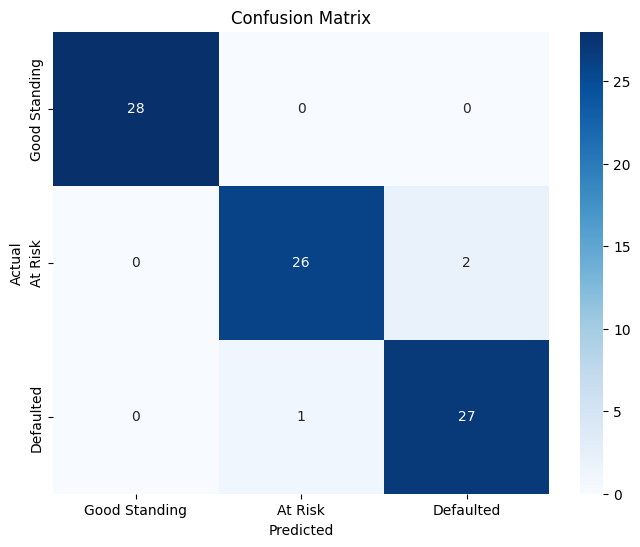

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare the feature set (X) and target variable (y)
X = eda_data.drop(columns=['Repayment_Category', 'Activity_Level'])  # Features
y = eda_data['Repayment_Category']  # Target variable

# Convert categorical target variable to numeric labels
y = y.map({'Good Standing': 0, 'At Risk': 1, 'Defaulted': 2})

# Step 2: Check the class distribution before resampling
print("Class distribution before resampling:")
print(y.value_counts())

# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Check the class distribution after resampling
print("Class distribution after applying SMOTE:")
print(y_resampled.value_counts())

# Step 5: Train-Test Split with the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 6: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
target_names = ['Good Standing', 'At Risk', 'Defaulted']
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 9: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()







After applying SMOTE to balance the dataset, the model achieved an accuracy of 96.43%, indicating strong overall performance. The classification report shows perfect precision, recall, and F1-scores of 1.00 for the "Good Standing" class, meaning all instances of this class were correctly identified. For the "At Risk" and "Defaulted" classes, the model performs very well, with F1-scores of 0.95, but there are minor misclassifications between these two classes.

In the confusion matrix, we see that the model perfectly classifies all "Good Standing" instances, but misclassifies 2 "At Risk" cases as "Defaulted" and 1 "Defaulted" case as "At Risk." Despite these minor errors, the precision and recall for all classes remain high, showing that the model handles the previously imbalanced data effectively. The model's performance across all metrics suggests it can reliably predict financial outcomes across the three categories after balancing the dataset.

In summary, the model now provides strong predictions for all classes, with a few minor misclassifications between the "At Risk" and "Defaulted" categories.

# Predictive Modeling Case# 2

Using a different target variable (y), we need to select a variable that best reflects financial well-being. One option could be the "FICO score", which is a widely used indicator of financial health. Alternatively, we could consider "loan repayment status" or "credit utilization".

In this example, let’s assume we use FICO score as the target variable (y). Since FICO score is a continuous variable, this becomes a regression problem.

FICO score distribution:
count    179.000000
mean     627.835965
std       48.926387
min      439.000000
25%      598.798701
50%      631.444444
75%      658.104412
max      788.000000
Name: average_FICO, dtype: float64
Mean Squared Error: 2207.788277079987
R-squared: 0.1507147309050565


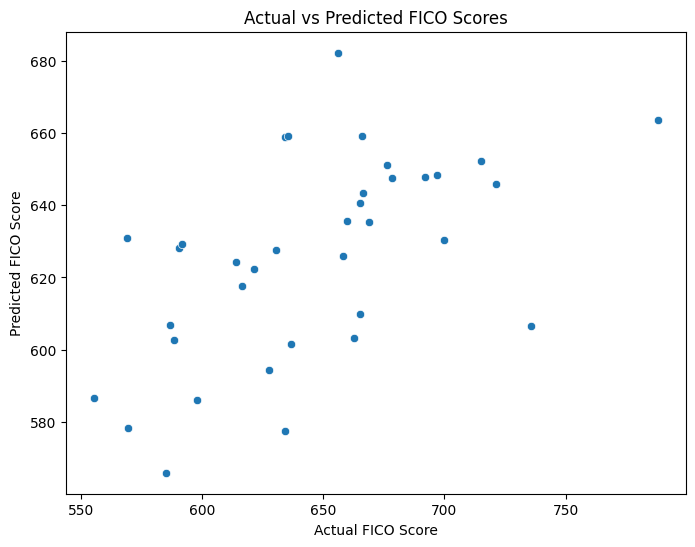

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the new target variable 'y' as 'average_FICO' (a measure of financial well-being)
X = eda_data.drop(columns=['average_FICO', 'Repayment_Category', 'Activity_Level'])  # Drop columns that won't be used as features
y = eda_data['average_FICO']  # Target variable

# Step 2: Check the distribution of the target variable (FICO score)
print("FICO score distribution:")
print(y.describe())

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = regressor.predict(X_test)

# Step 6: Evaluate the model (using Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 7: Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FICO Score')
plt.ylabel('Predicted FICO Score')
plt.title('Actual vs Predicted FICO Scores')
plt.show()



The model's performance for predicting FICO scores shows a mean FICO score of 627.8, with a standard deviation of 48.92, indicating moderate variability in the dataset. The minimum score is 439, and the maximum is 788, showing a wide range of credit scores among customers. The majority of FICO scores fall between 598.79 and 658.10 (the 25th to 75th percentiles), suggesting that most customers have scores around this range.

The model's Mean Squared Error (MSE) is 2207.79, indicating substantial deviation between the actual and predicted FICO scores. The R-squared (R²) score of 0.15 is quite low, meaning that only 15% of the variability in the FICO score is explained by the model, signaling poor predictive power.

The scatterplot comparing actual and predicted FICO scores shows a noticeable spread, with many predictions deviating significantly from the actual values. Ideally, the points should align along the diagonal, but here, there is substantial scattering, particularly for higher FICO scores, indicating the model's difficulty in accurately predicting scores.

These results suggest that the current features used for prediction may not be strong enough to capture the patterns in FICO scores. Further feature engineering, the inclusion of more relevant predictors (such as loan repayment behavior, credit utilization), or the use of more advanced models like XGBoost or neural networks may help improve predictive accuracy.

# Predictive Modeling Case# 3

To improve the model, we will now introduce credit utilization as a feature and use the XGBoost algorithm, which often performs well with structured data. Here’s how we can update the previous code to incorporate credit utilization and train an XGBoost model for predicting FICO scores.

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 4109.909277255406
R-squared: -0.5809873812294022


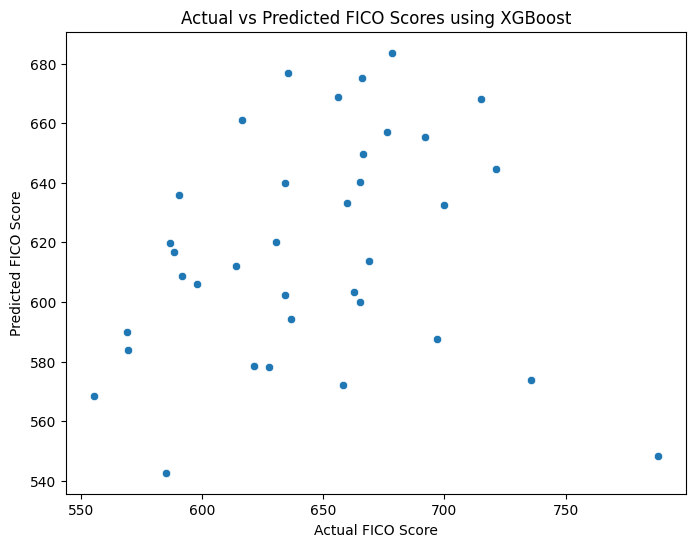

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the feature set 'X' including 'average_credit_utilisation' and target variable 'y'
X = eda_data[['average_credit_utilisation', 'Loan Amount', 'Outstanding Balance', 'Interest Rate', 'Loan Term (Months)']]  # Features
y = eda_data['average_FICO']  # Target variable (FICO score)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the model (using Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 6: Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FICO Score')
plt.ylabel('Predicted FICO Score')
plt.title('Actual vs Predicted FICO Scores using XGBoost')
plt.show()


The XGBoost model for predicting FICO scores shows a Mean Squared Error (MSE) of 4109.91, which is relatively high, indicating significant differences between the predicted and actual FICO scores. The R-squared (R²) value of -0.58 suggests that the model performs worse than a baseline model that would predict the mean FICO score for all observations. This negative R² indicates that XGBoost is struggling to fit the data properly, likely due to a mismatch between the model's complexity and the available features.

In the scatter plot, the predicted FICO scores (y-axis) are compared to the actual FICO scores (x-axis). Ideally, the points should align along the diagonal line, but here they are widely scattered, showing significant discrepancies between the actual and predicted values. The model particularly struggles with FICO scores above 650, where there are several large deviations, and there is no clear pattern that suggests the model is accurately capturing the relationships in the data.

The poor performance of XGBoost in this case may be due to insufficient feature engineering, lack of relevant predictors, or improper tuning of the model's hyperparameters. The model is unable to generalize well, suggesting that either more advanced feature extraction is required or a different model may be better suited for this task.

Other Algorithms: Explore other machine learning models, such as neural networks or ridge regression, which might perform better for this kind of regression problem.

# Predictive Modeling Case# 4

We will use Ridge Regression to attempt improving the prediction of FICO scores. Ridge regression is a regularized linear regression technique that can help prevent overfitting, especially when the model has many features or when features are highly correlated.

Mean Squared Error: 2178.5809886759907
R-squared: 0.16195010163749324


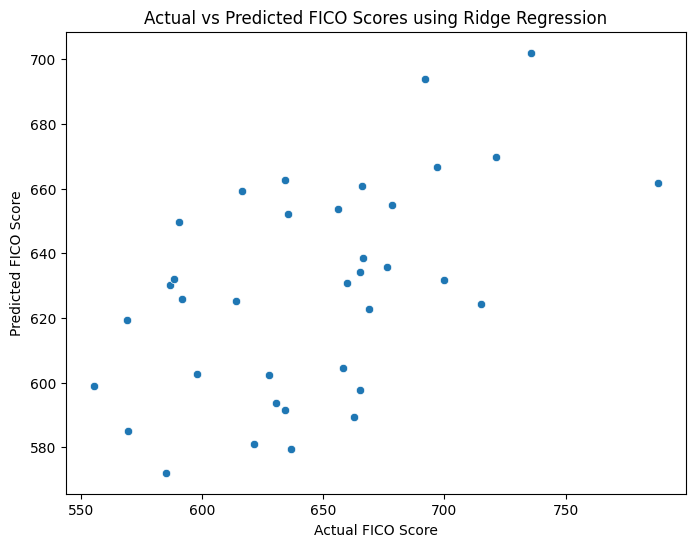

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the feature set 'X' including 'average_credit_utilisation' and target variable 'y'
X = eda_data[['average_credit_utilisation', 'Loan Amount', 'Outstanding Balance', 'Interest Rate', 'Loan Term (Months)']]  # Features
y = eda_data['average_FICO']  # Target variable (FICO score)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Step 5: Evaluate the model (using Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 6: Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FICO Score')
plt.ylabel('Predicted FICO Score')
plt.title('Actual vs Predicted FICO Scores using Ridge Regression')
plt.show()


The Ridge Regression model for predicting FICO scores has a Mean Squared Error (MSE) of 2178.58, which shows moderate predictive performance. This MSE indicates the average squared difference between the actual and predicted FICO scores, and while it is better than XGBoost's performance, there is still significant room for improvement. The R-squared (R²) value of 0.16 suggests that the model only explains about 16% of the variance in the FICO scores, indicating that important factors influencing FICO scores are not captured by the current features in the model.

The scatter plot shows the relationship between actual and predicted FICO scores. Ideally, the points should lie along the diagonal, indicating perfect predictions. However, the scatter plot shows a noticeable spread, with several points deviating from the diagonal line, particularly for scores above 650, where the model struggles the most.

The Ridge Regression model performs reasonably well for FICO scores between 600 and 650, where the predictions are more tightly clustered around the actual values, but it still shows variability. This model benefits from the regularization offered by Ridge Regression, but the low R² suggests that the linear approach may not be fully capturing the relationships in the data, and additional feature engineering or more complex models may be required to improve the predictions.

# Predictive Modeling Case# 5

We will use Lasso Regression, which is similar to Ridge Regression but uses L1 regularization. This type of regularization tends to shrink less important feature coefficients to zero, effectively performing feature selection as well as regression. We thought tis would be useful to have a more interpretable model with fewer features.

Mean Squared Error: 2125.2706485964477
R-squared: 0.18245736086611786


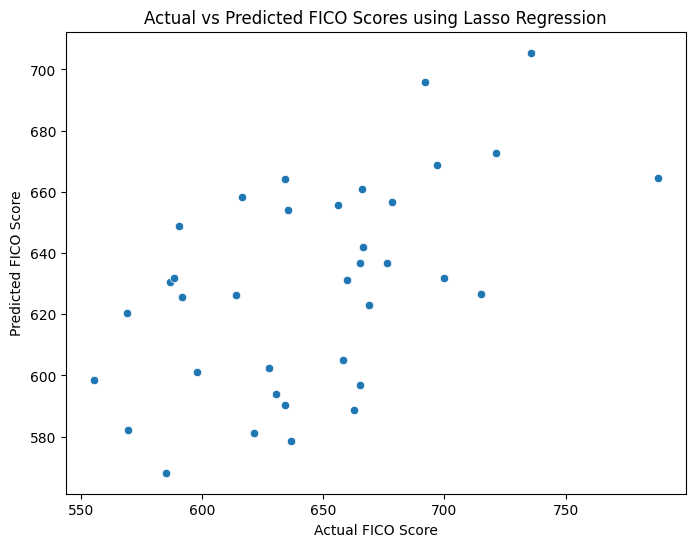

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the feature set 'X' including 'average_credit_utilisation' and target variable 'y'
X = eda_data[['average_credit_utilisation', 'Loan Amount', 'Outstanding Balance', 'Interest Rate', 'Loan Term (Months)']]  # Features
y = eda_data['average_FICO']  # Target variable (FICO score)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Lasso Regression Model
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Step 5: Evaluate the model (using Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 6: Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual FICO Score')
plt.ylabel('Predicted FICO Score')
plt.title('Actual vs Predicted FICO Scores using Lasso Regression')
plt.show()


The results from the Lasso Regression model indicate that it is making some improvements but still struggles to accurately predict FICO scores. The Mean Squared Error (MSE) of 2125.27 reflects the average squared difference between the actual and predicted FICO scores, and while it is an improvement over previous models, it suggests there is still room for refinement. The R-squared (R²) value of 0.18 means that the model only explains about 18% of the variance in the FICO scores, which indicates that many important factors affecting FICO scores are not captured by the current feature set.

The scatter plot shows how the predicted FICO scores (y-axis) compare to the actual FICO scores (x-axis). Ideally, the points should align along the diagonal line, but the plot shows significant scatter, especially for FICO scores above 650, where the model consistently underestimates or overestimates the actual scores. The model performs slightly better for customers with scores between 600 and 650, where the points are more clustered, but still shows variability in predictions.

Overall, while Lasso Regression has provided some improvement over previous models, the low R² score and significant scatter indicate that additional feature engineering or more complex models may be needed to improve prediction accuracy.

In [32]:
# Key Insights for Strategy

# 1. Customer Segmentation:
# Based on financial behaviors such as high credit utilization, loan repayment status, and FICO score predictions, 
# customers can be segmented into groups (e.g., repayers, past-due, written-off). 
# This allows for more targeted strategies such as offering repayment assistance to customers at risk or personalized advice for better financial health.

def segment_customers(credit_util, fico_score):
    if credit_util > 0.8 and fico_score < 600:
        return 'High Risk - At Risk of Default'
    elif credit_util > 0.5 and fico_score < 650:
        return 'Medium Risk - Needs Financial Guidance'
    else:
        return 'Low Risk - Good Standing'

# Apply the segmentation based on financial behavior
eda_data['Risk_Segment'] = eda_data.apply(lambda row: segment_customers(row['average_credit_utilisation'], row['average_FICO']), axis=1)

# Display the segmentation results
print(eda_data[['average_credit_utilisation', 'average_FICO', 'Risk_Segment']].head())

# 2. Behavioral Triggers:
# We will use credit utilization and other metrics as early warning signals for deteriorating financial health.
# Example: High credit utilization or a sharp decline in wellness scores could indicate financial stress.

def identify_behavioral_triggers(row):
    if row['average_credit_utilisation'] > 0.8:
        return 'Trigger - High Credit Utilization'
    elif row['average_wellness_score'] < 3:
        return 'Trigger - Low Wellness Score'
    else:
        return 'No Trigger'

# Apply behavioral triggers identification
eda_data['Behavioral_Trigger'] = eda_data.apply(identify_behavioral_triggers, axis=1)

# Display the behavioral triggers results
print(eda_data[['average_credit_utilisation', 'average_wellness_score', 'Behavioral_Trigger']].head())

# 3. Personalized Recommendations:
# Provide personalized recommendations based on the risk segment and behavioral triggers. 
# For example, customers with high credit utilization might receive advice to lower their utilization rate to improve FICO scores.

def generate_personalized_recommendations(row):
    if row['Risk_Segment'] == 'High Risk - At Risk of Default':
        return 'Recommendation: Focus on reducing credit utilization and exploring debt consolidation.'
    elif row['Behavioral_Trigger'] == 'Trigger - Low Wellness Score':
        return 'Recommendation: Engage with financial wellness programs to improve financial stability.'
    else:
        return 'Recommendation: Keep up with healthy financial habits.'

# Apply personalized recommendations
eda_data['Personalized_Recommendation'] = eda_data.apply(generate_personalized_recommendations, axis=1)

# Display the recommendations
print(eda_data[['Risk_Segment', 'Behavioral_Trigger', 'Personalized_Recommendation']].head())

   average_credit_utilisation  average_FICO  \
0                    0.947119    565.571429   
3                    0.938035    612.571429   
4                    0.897727    524.000000   
5                    0.636450    748.500000   
6                    1.757357    599.142857   

                             Risk_Segment  
0          High Risk - At Risk of Default  
3  Medium Risk - Needs Financial Guidance  
4          High Risk - At Risk of Default  
5                Low Risk - Good Standing  
6          High Risk - At Risk of Default  
   average_credit_utilisation  average_wellness_score  \
0                    0.947119               21.000000   
3                    0.938035               48.200000   
4                    0.897727               44.857143   
5                    0.636450               50.000000   
6                    1.757357               36.285714   

                  Behavioral_Trigger  
0  Trigger - High Credit Utilization  
3  Trigger - High Credit Utiliza

1. Customer Segmentation (Risk Segment):
Customers are divided into risk segments based on their credit utilization and FICO score:
- High Risk - At Risk of Default: Customers like row 0, 4, and 6 have high credit utilization (e.g., 0.947, 0.897, and 1.757) and lower FICO scores (e.g., 565, 524, and 599). These customers are considered at high risk for default, needing urgent attention.
- Medium Risk - Needs Financial Guidance: Row 3 shows a customer with medium credit utilization (0.938) and a moderate FICO score (612). This customer might not be in immediate danger but could benefit from financial guidance to avoid further deterioration.
- Low Risk - Good Standing: Row 5 represents a customer with lower credit utilization (0.636) and a high FICO score (748). This customer is in good financial standing and does not require immediate intervention.

2. Behavioral Triggers:
- High Credit Utilization Trigger: For rows 0, 3, 4, and 6, the high credit utilization (>0.8) has been flagged as a behavioral trigger. This means these customers might be over-relying on credit and could be at risk of financial stress. Early intervention can help these customers manage their credit better.
- No Trigger: Row 5, with lower credit utilization (0.636), does not have any behavioral triggers, indicating stable financial behavior.

3. Personalized Recommendations:
- For High Risk Customers (e.g., Rows 0, 4, and 6): The recommendations focus on reducing credit utilization and exploring debt consolidation to prevent default. These customers are identified as needing immediate intervention to prevent further financial decline.
- For Medium Risk (e.g., Row 3): The recommendation focuses on maintaining healthy financial habits while focusing on credit utilization reduction to avoid falling into higher risk categories.
- For Low Risk (e.g., Row 5): The recommendation is to continue with the healthy financial habits, as these customers are in good financial standing and do not need any drastic changes.

Summary of Results:
- The Risk Segment helps classify customers into actionable categories (High Risk, Medium Risk, and Low Risk), making it easier to tailor financial strategies based on their behavior.
- Behavioral Triggers identify early warning signs (such as high credit utilization) for customers who are potentially at risk, allowing proactive financial interventions.
- The Personalized Recommendations provide specific advice to each customer based on their risk level, helping them take actionable steps to improve their financial well-being.

Strategic Action Points:
- High Risk Customers should be prioritized for interventions like debt consolidation or financial restructuring to prevent default.
- Medium Risk Customers need targeted financial guidance to lower their credit utilization and improve their overall financial health.
- Low Risk Customers should be encouraged to maintain their healthy financial behaviors, with minimal intervention required.